Tasks
- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?
- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
path = r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities"
sys.path.append(path)
import plot_settings

In [2]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu_sample = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THI

In [3]:
with open('mu_z.txt', 'w') as f:
    for z, mu, dmu in zip(z_sample, mu_sample, dmu_sample):
        f.write(f"{z} {mu} {dmu}\n")
    f.close()

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_19588\2962798895.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


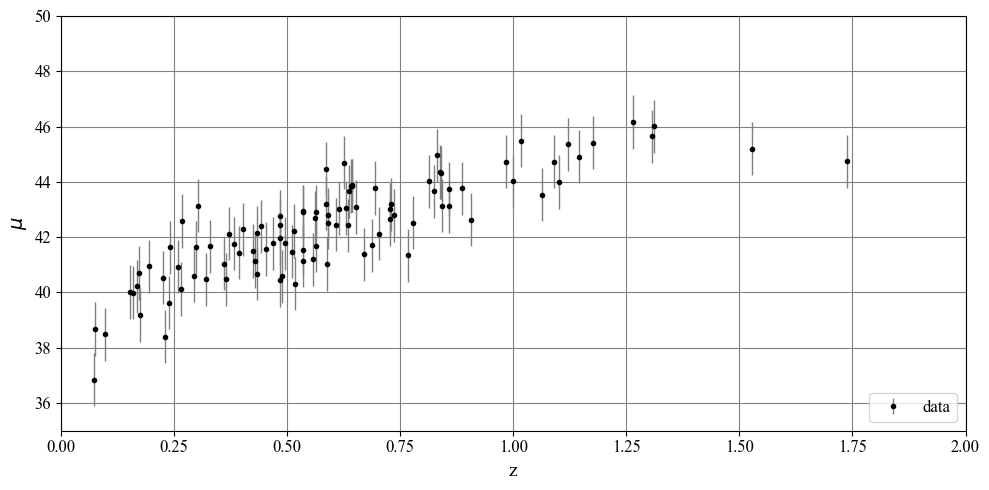

In [4]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

# Fit Data

## Method 1 : Linear Regression , $1^{st}$ Degree

In [5]:
X = np.array([z_sample, mu_sample]).T

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
z_train, z_test, mu_train, mu_test, mu_err_train, mu_err_test = train_test_split(z_sample, mu_sample, dmu_sample, test_size=0.25, random_state=1234)

In [8]:
from astroML.linear_model import PolynomialRegression

c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [9]:
model = PolynomialRegression(degree=1)

In [10]:
model.fit(z_train.reshape((-1,1)), mu_train, y_error=mu_err_train)

PolynomialRegression()

In [11]:
mu_pred = model.predict(z_test.reshape((-1,1)))

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_19588\4044294134.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


Text(0.5, 1.0, 'Prediction: 5th degree polynomial')

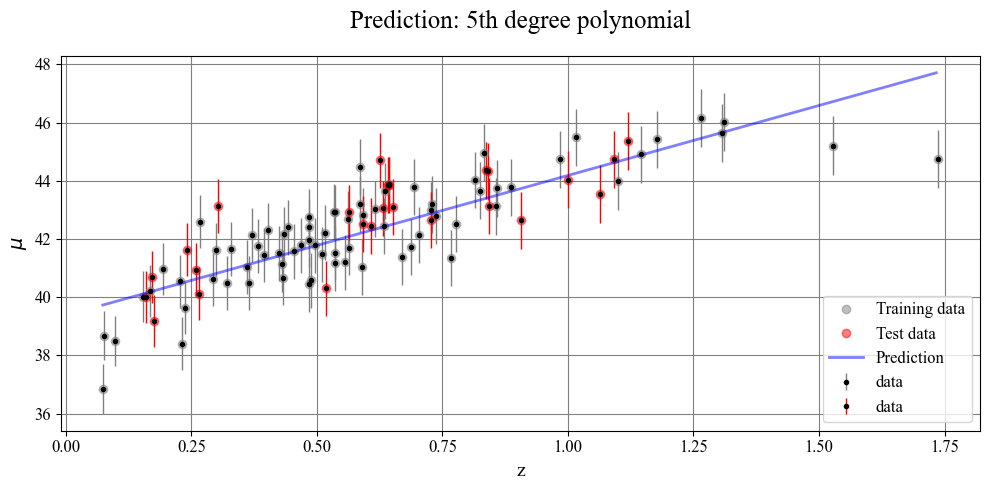

In [12]:
x_fit = np.arange(min(z_sample), max(z_sample), 0.01)
y_fit = model.predict(x_fit.reshape((-1,1)))
plt.errorbar(z_train, mu_train, mu_err_train, fmt='.k', ecolor='gray', lw=1,label='data')
plt.errorbar(z_test, mu_test, mu_err_test, fmt='.k', ecolor='red', lw=1,label='data')
plt.plot(z_train, mu_train, 'o', label='Training data', color='gray', alpha=0.5)
plt.plot(z_test, mu_test, 'o', label='Test data', color='red', alpha=0.5)
plt.plot(x_fit, y_fit, label='Prediction', color='blue', alpha=0.5)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title('Prediction: %dth degree polynomial' % 5)

## $2^{nd}$ Degree

In [13]:
model = PolynomialRegression(degree=2)
model.fit(z_train.reshape((-1,1)), mu_train, y_error=mu_err_train)
mu_pred = model.predict(z_test.reshape((-1,1)))

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_19588\2058966827.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


Text(0.5, 1.0, 'Prediction: 2th degree polynomial')

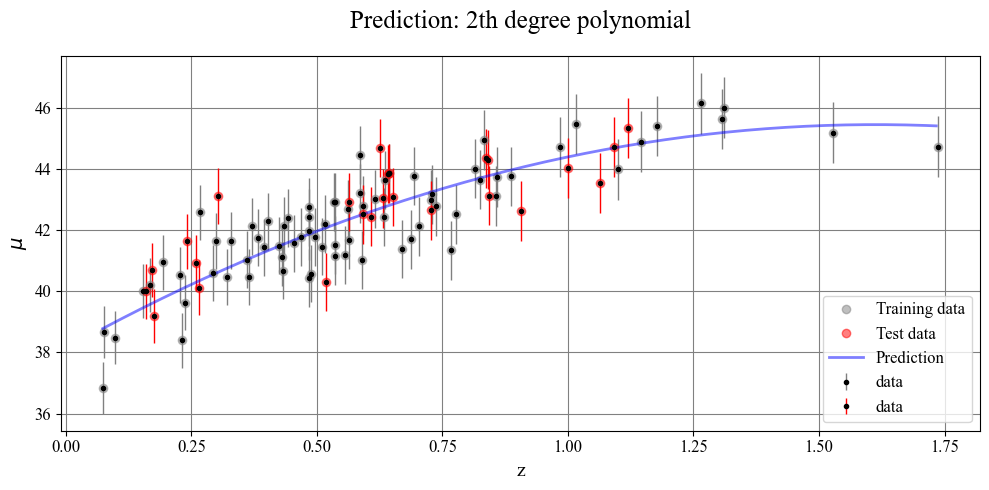

In [14]:
x_fit = np.arange(min(z_sample), max(z_sample), 0.01)
y_fit = model.predict(x_fit.reshape((-1,1)))
plt.errorbar(z_train, mu_train, mu_err_train, fmt='.k', ecolor='gray', lw=1,label='data')
plt.errorbar(z_test, mu_test, mu_err_test, fmt='.k', ecolor='red', lw=1,label='data')
plt.plot(z_train, mu_train, 'o', label='Training data', color='gray', alpha=0.5)
plt.plot(z_test, mu_test, 'o', label='Test data', color='red', alpha=0.5)
plt.plot(x_fit, y_fit, label='Prediction', color='blue', alpha=0.5)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title('Prediction: %dth degree polynomial' % 2)

## $5^{th}$ Degree

In [15]:
model = PolynomialRegression(degree=5)
model.fit(z_train.reshape((-1,1)), mu_train, y_error=mu_err_train)
mu_pred = model.predict(z_test.reshape((-1,1)))

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_19588\4044294134.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


Text(0.5, 1.0, 'Prediction: 5th degree polynomial')

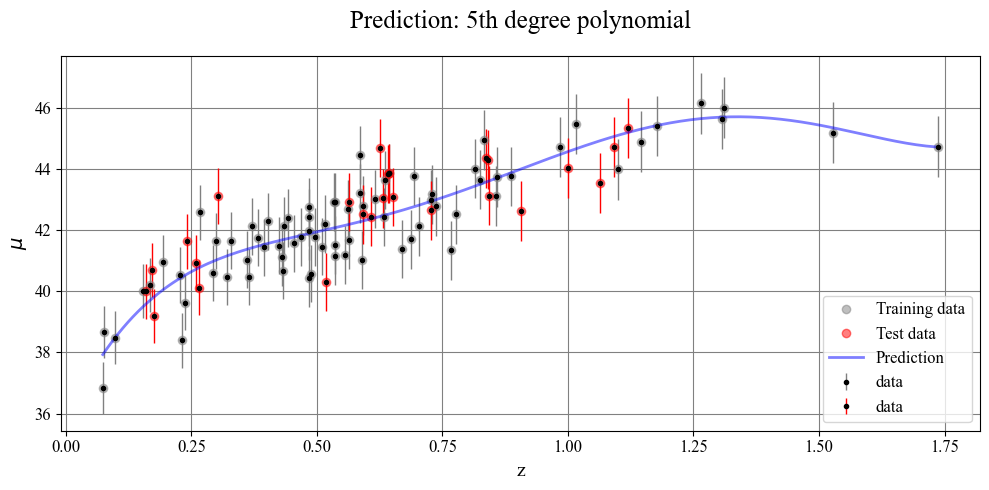

In [16]:
x_fit = np.arange(min(z_sample), max(z_sample), 0.01)
y_fit = model.predict(x_fit.reshape((-1,1)))
plt.errorbar(z_train, mu_train, mu_err_train, fmt='.k', ecolor='gray', lw=1,label='data')
plt.errorbar(z_test, mu_test, mu_err_test, fmt='.k', ecolor='red', lw=1,label='data')
plt.plot(z_train, mu_train, 'o', label='Training data', color='gray', alpha=0.5)
plt.plot(z_test, mu_test, 'o', label='Test data', color='red', alpha=0.5)
plt.plot(x_fit, y_fit, label='Prediction', color='blue', alpha=0.5)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title('Prediction: %dth degree polynomial' % 5)

## $7^{th}$ Degree

In [17]:
model = PolynomialRegression(degree=7)
model.fit(z_train.reshape((-1,1)), mu_train, y_error=mu_err_train)
mu_pred = model.predict(z_test.reshape((-1,1)))

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_19588\1109084793.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


Text(0.5, 1.0, 'Prediction: 7th degree polynomial')

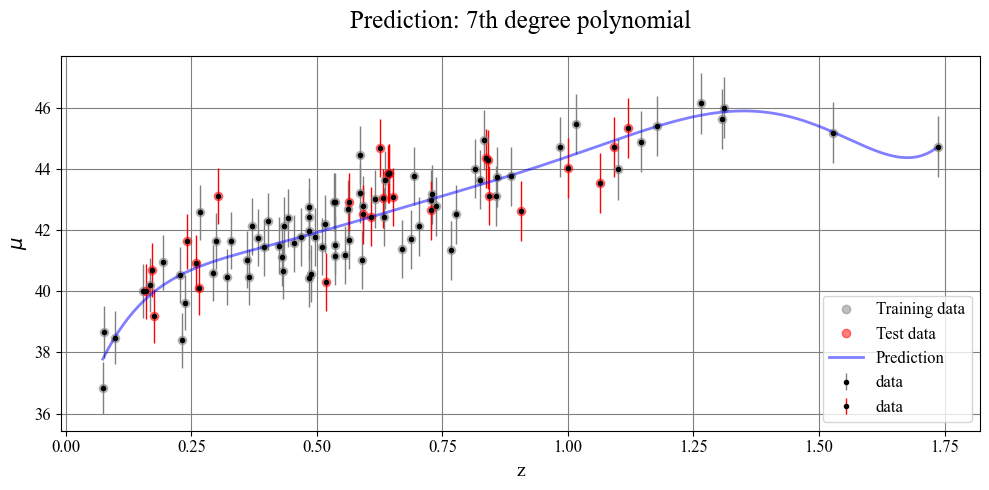

In [18]:
x_fit = np.arange(min(z_sample), max(z_sample), 0.01)
y_fit = model.predict(x_fit.reshape((-1,1)))
plt.errorbar(z_train, mu_train, mu_err_train, fmt='.k', ecolor='gray', lw=1,label='data')
plt.errorbar(z_test, mu_test, mu_err_test, fmt='.k', ecolor='red', lw=1,label='data')
plt.plot(z_train, mu_train, 'o', label='Training data', color='gray', alpha=0.5)
plt.plot(z_test, mu_test, 'o', label='Test data', color='red', alpha=0.5)
plt.plot(x_fit, y_fit, label='Prediction', color='blue', alpha=0.5)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.title('Prediction: %dth degree polynomial' % 7)

Ad occhio, tenendo conto di come si distribuiscono i dati predetti attorno alle lineshape ma anche del numero di parametri liberi del modello, direi che il migliore è quello di grado 5

## Cross - Validation

In [19]:
from sklearn.model_selection import ShuffleSplit

In [20]:
CV = ShuffleSplit(n_splits=10, test_size=0.25, random_state=1234)

In [21]:
X = np.vstack((z_sample, mu_sample, dmu_sample)).T

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
def Cross_Validation_Fit(X, deg):
    """
    Cross-validated fit of a polynomial model of degree `deg`.
    Returns MSEs, AIC, and BIC averaged over folds.
    """
    test_mse_list = []
    train_mse_list = []
    aic_list = []
    bic_list = []

    for train_idx, test_idx in CV.split(X):
        model = PolynomialRegression(degree=deg)
        model.fit(X[train_idx, 0].reshape((-1,1)), X[train_idx, 1], y_error=X[train_idx, 2])
        
        y_train_pred = model.predict(X[train_idx, 0].reshape((-1,1)))
        y_test_pred = model.predict(X[test_idx, 0].reshape((-1,1)))
        
        y_train_true = X[train_idx, 1]
        y_test_true = X[test_idx, 1]

        # MSEs
        mse_train = mean_squared_error(y_train_true, y_train_pred)
        mse_test = mean_squared_error(y_test_true, y_test_pred)
        
        # RSS
        rss = np.sum((y_train_true - y_train_pred) ** 2)
        n = len(y_train_true)
        k = deg + 1  # degree + intercept
        
        # AIC and BIC
        aic = n * np.log(rss / n) + 2 * k
        bic = n * np.log(rss / n) + k * np.log(n)

        # Append metrics
        train_mse_list.append(mse_train)
        test_mse_list.append(mse_test)
        aic_list.append(aic)
        bic_list.append(bic)

    return (
        np.mean(test_mse_list),
        np.mean(train_mse_list),
        np.mean(aic_list),
        np.mean(bic_list)
    )


In [24]:
degrees = np.arange(1, 10)

In [25]:
epsilon_train, epsilon_test, aics, bics = [], [], [], []
for deg in degrees:
    mtest, mtrain, aic, bic = Cross_Validation_Fit(X, deg)
    epsilon_test.append(mtest)
    epsilon_train.append(mtrain)
    aics.append(aic)
    bics.append(bic)

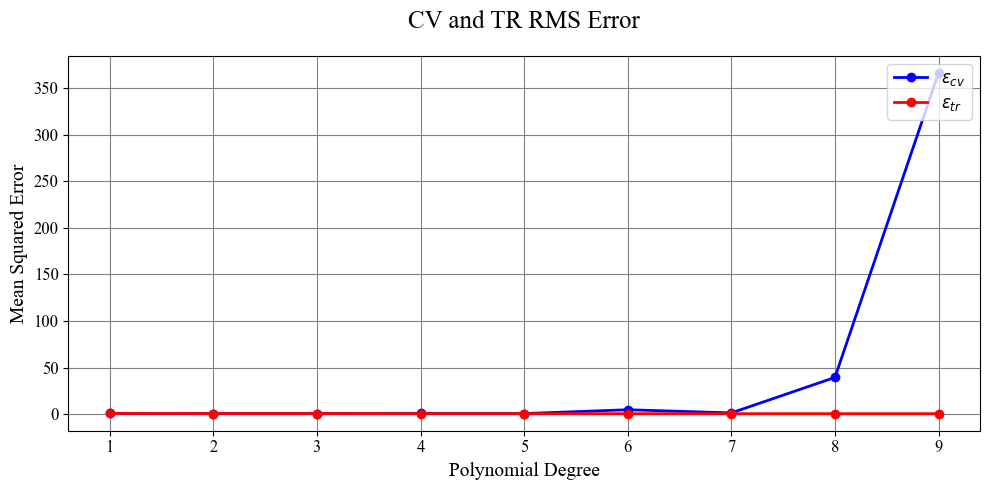

In [26]:
plt.plot(degrees, epsilon_test, color='blue',marker='o', label=r'$\epsilon_{cv}$')
plt.plot(degrees, epsilon_train, color='red',marker='o', label=r'$\epsilon_{tr}$')
plt.title('CV and TR RMS Error')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend(loc='upper right')

Dall'andamento di $\epsilon_{tr}$ e $\epsilon_{cv}$ direi che il miglior grado è il quinto.\
Dopo il quinto grado il $\epsilon_{tr}$ rimane circa costante (non sto imparando nuove feature all'aumentare del grado del polinomio, mentre aumenta vertiginosamente $\epsilon_{cv}$ il che significa che il modello è in $\bold{overfitting}$).\
Mi fermerei quindi al grado prima dell'overfitting, il quinto.

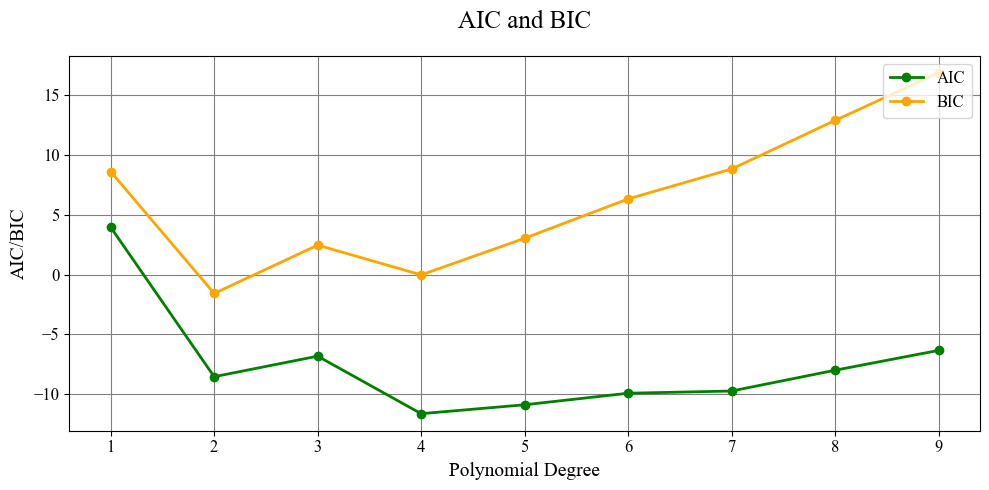

In [27]:
plt.plot(degrees, aics, color='green',marker='o', label='AIC')
plt.plot(degrees, bics, color='orange',marker='o', label='BIC')
plt.title('AIC and BIC')
plt.xlabel('Polynomial Degree')
plt.ylabel('AIC/BIC')
plt.legend(loc='upper right')

Guardando AIC e BIC sembra che il migliore sia il $4^{o}$ grado

## Method 2: Basis Function Regression

In [28]:
from astroML.linear_model import BasisFunctionRegression

In [41]:
X_grid = np.array([0.25, 1.25])[:, None]

In [46]:
sigma_test = 0.5

In [47]:
model = BasisFunctionRegression('gaussian', mu=X_grid, sigma=sigma_test)

In [ ]:
model.fit(z_train.reshape((-1,1)), mu_train, y_error=mu_err_train)
mu_pred = model.predict(z_test.reshape((-1,1)))

Text(0.5, 1.0, 'Prediction: Gaussian basis function')

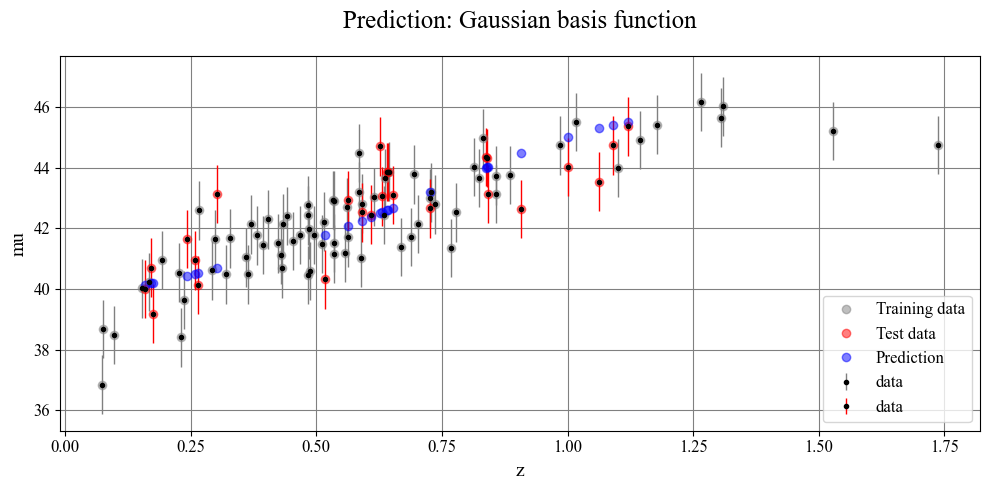

In [49]:
plt.errorbar(z_train, mu_train, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.errorbar(z_test, mu_test, dmu, fmt='.k', ecolor='red', lw=1,label='data')
plt.plot(z_train, mu_train, 'o', label='Training data', color='gray', alpha=0.5)
plt.plot(z_test, mu_test, 'o', label='Test data', color='red',
            alpha=0.5)
plt.plot(z_test, mu_pred, 'o', label='Prediction', color='blue', alpha=0.5)
plt.xlabel("z")
plt.ylabel("mu")
plt.legend(loc='lower right')
plt.title('Prediction: Gaussian basis function')

In [ ]:
def Cross_Validation_Fit_2(X, X_grid, sigma_test):
    """
    Cross-validated fit of a polynomial model of degree `deg`.
    Returns MSEs, AIC, and BIC averaged over folds.
    """
    test_mse_list = []
    train_mse_list = []
    aic_list = []
    bic_list = []

    for train_idx, test_idx in CV.split(X):
        
        model = BasisFunctionRegression('gaussian', mu=X_grid, sigma=sigma_test)
        model.fit(z_train.reshape((-1,1)), mu_train, y_error=mu_err_train)
        
        y_train_pred = model.predict(X[train_idx, 0].reshape((-1,1)))
        y_test_pred = model.predict(X[test_idx, 0].reshape((-1,1)))
        
        y_train_true = X[train_idx, 1]
        y_test_true = X[test_idx, 1]

        # MSEs
        mse_train = mean_squared_error(y_train_true, y_train_pred)
        mse_test = mean_squared_error(y_test_true, y_test_pred)
        
        # RSS
        rss = np.sum((y_train_true - y_train_pred) ** 2)
        n = len(y_train_true)
        k = deg + 1  # degree + intercept
        
        # AIC and BIC
        aic = n * np.log(rss / n) + 2 * k
        bic = n * np.log(rss / n) + k * np.log(n)

        # Append metrics
        train_mse_list.append(mse_train)
        test_mse_list.append(mse_test)
        aic_list.append(aic)
        bic_list.append(bic)

    return (
        np.mean(test_mse_list),
        np.mean(train_mse_list),
        np.mean(aic_list),
        np.mean(bic_list)
    )


In [70]:
epsilon_train, epsilon_test, aics, bics = [], [], [], []
sigma_test = 0.25
for gn in range(15):
    X_grid = np.linspace(z_sample.min(), z_sample.max(), gn)[:, None]
    mtest, mtrain, aic, bic = Cross_Validation_Fit_2(X, X_grid, sigma_test)
    epsilon_test.append(mtest)
    epsilon_train.append(mtrain)
    aics.append(aic)
    bics.append(bic)

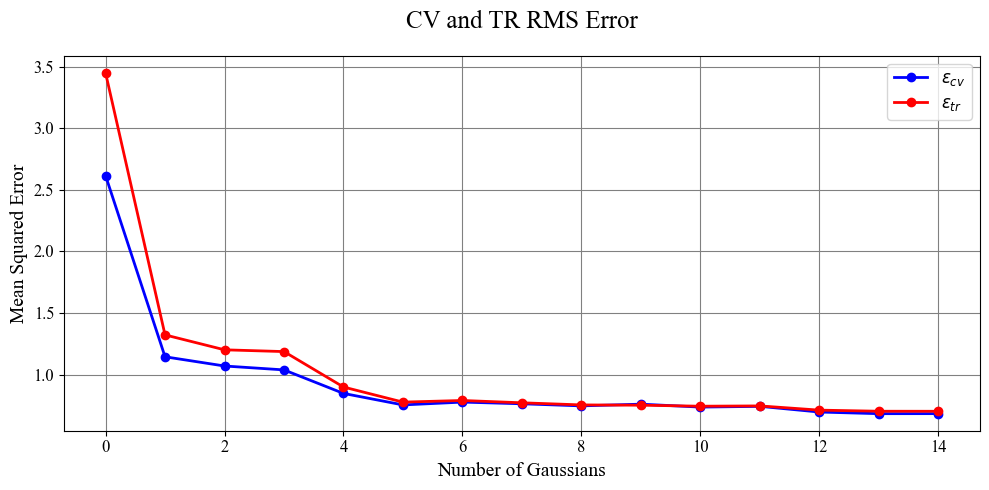

In [71]:
plt.plot(epsilon_test, color='blue',marker='o', label=r'$\epsilon_{cv}$')
plt.plot(epsilon_train, color='red',marker='o', label=r'$\epsilon_{tr}$')
plt.title('CV and TR RMS Error')
plt.xlabel('Number of Gaussians')
plt.ylabel('Mean Squared Error')
plt.legend(loc='upper right')

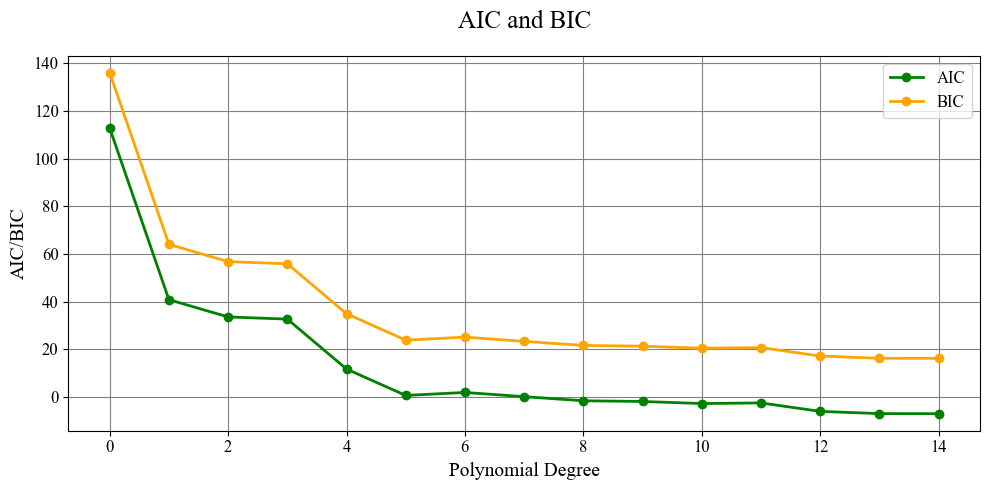

In [72]:
plt.plot(aics, color='green',marker='o', label='AIC')
plt.plot(bics, color='orange',marker='o', label='BIC')
plt.title('AIC and BIC')
plt.xlabel('Polynomial Degree')
plt.ylabel('AIC/BIC')
plt.legend(loc='upper right')

## Method 3: Kernel Regression

In [73]:
from astroML.linear_model import NadarayaWatson

In [76]:
def Cross_Validation_Fit_3(X):
    """
    Cross-validated fit of a polynomial model of degree `deg`.
    Returns MSEs, AIC, and BIC averaged over folds.
    """
    test_mse_list = []
    train_mse_list = []
    aic_list = []
    bic_list = []

    for train_idx, test_idx in CV.split(X):
        
        model = NadarayaWatson(kernel='gaussian', bandwidth=0.25)
        model.fit(z_train.reshape((-1,1)), mu_train)
        
        y_train_pred = model.predict(X[train_idx, 0].reshape((-1,1)))
        y_test_pred = model.predict(X[test_idx, 0].reshape((-1,1)))
        
        y_train_true = X[train_idx, 1]
        y_test_true = X[test_idx, 1]

        # MSEs
        mse_train = mean_squared_error(y_train_true, y_train_pred)
        mse_test = mean_squared_error(y_test_true, y_test_pred)
        
        # RSS
        rss = np.sum((y_train_true - y_train_pred) ** 2)
        n = len(y_train_true)
        k = deg + 1  # degree + intercept
        
        # AIC and BIC
        aic = n * np.log(rss / n) + 2 * k
        bic = n * np.log(rss / n) + k * np.log(n)

        # Append metrics
        train_mse_list.append(mse_train)
        test_mse_list.append(mse_test)
        aic_list.append(aic)
        bic_list.append(bic)

    return (
        np.mean(test_mse_list),
        np.mean(train_mse_list),
        np.mean(aic_list),
        np.mean(bic_list)
    )


In [77]:
cose = Cross_Validation_Fit_3(X)

TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'